# Visualización de datos N-Dimensionales

## ANÁLISIS VISUAL DE GRANDES CONJUNTOS DE DATOS - UNS
## Actividad Nro. 4

### Clasificación de estilos de cerveza a partir de los atributos numéricos de la receta.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
filepath = '../input/brewers-friend-recipescsv/Brewers_Friend_Recipes.csv'
data = pd.read_csv(filepath, index_col = 'BeerID', encoding = 'latin-1')

## Vista general de los datos

Los datos consisten en 73861 observaciones y contienen 6 atributos categóricos y 17 atributos numéricos

In [2]:
print("Dimensiones del dataset: ",data.shape)
data.head()

Dimensiones del dataset:  (73861, 22)


,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
BeerID,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


## Lista de estilos más comunes

El estilo de la receta más utilizada es la "American IPA" y abarca una proporción del 16.3%.
Para el análisis visual se utilizarán las primeras 10 clases más frecuentes.

In [3]:
popularity = data['Style'].value_counts(normalize=True) # Frecuencia de cada clase
top_ten = popularity[:10] # Mostrar 10 primeras
print('Estilos más comunes:')
top_ten


Estilos más comunes:


American IPA            0.162970
American Pale Ale       0.103474
Saison                  0.035720
American Light Lager    0.031079
American Amber Ale      0.027817
Blonde Ale              0.023927
Imperial IPA            0.020173
American Stout          0.017307
Irish Red Ale           0.016433
American Brown Ale      0.015724
Name: Style, dtype: float64

## Limpieza de los datos

Submuestrear el 3% de los datos y eliminar columnas con atributos que no se van a utilizar. El resultado queda de 999 filas por 7 columnas.

In [4]:
not_relevant_columns = ['URL', 'StyleID', 'Size(L)', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency', 'MashThickness', 'SugarScale', 'BrewMethod', 'PitchRate', 'PrimaryTemp', 'PrimingMethod', 'PrimingAmount', 'UserId']
top_ten_styles = list(top_ten.keys()) # Extraer los nombres de las clases

clean_data = data[ data['Style'].isin( top_ten_styles ) ] \
            .drop(columns = not_relevant_columns, axis=1)

ss_data = clean_data.sample(frac = 0.03) # Submuestreo sin reemplazo 3%
            
print('Datos limpios:')
ss_data

Datos limpios:


,Name,Style,OG,FG,ABV,IBU,Color
BeerID,,,,,,,
53614,Long Time Gone Irish Ale,Irish Red Ale,1.086,1.024,8.02,17.69,41.92
7785,1. Red Barn Clone (50%),Saison,1.065,1.018,6.09,27.12,6.07
67939,Pale ale,American Pale Ale,1.054,1.017,4.97,33.50,7.14
47356,Saison,Saison,1.049,1.018,3.97,26.04,5.08
66393,First And Foremost,American IPA,1.070,1.019,6.68,53.86,6.67
...,...,...,...,...,...,...,...
7086,Saison,Saison,1.057,1.011,5.97,33.48,10.62
73813,Hot Chocolate Stout,American Stout,1.073,1.022,6.69,37.83,33.87
35345,Classic American Pale Ale,American Pale Ale,1.050,1.011,5.13,39.54,6.29


## Obtener matriz de datos dispersos

Los atributos que más dispersan los estilos son Color, IBU y ABV.

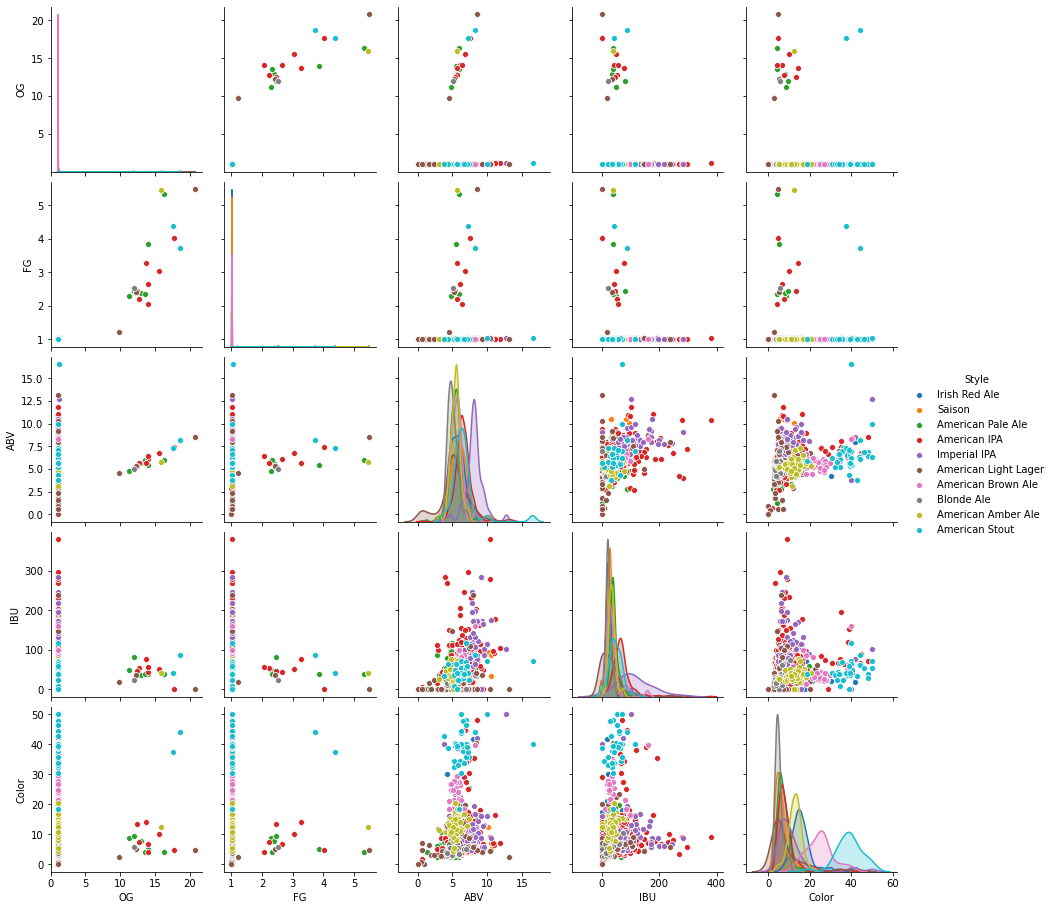

In [5]:
sns.pairplot(ss_data, hue="Style");

## Mostrar las relaciones más relevantes


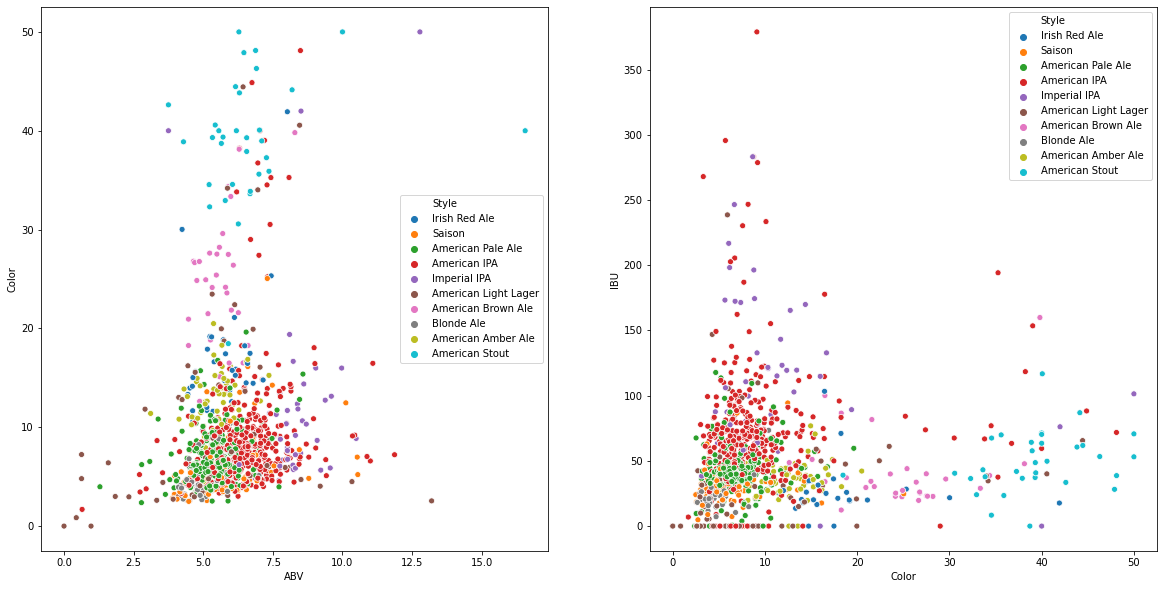

In [6]:
fig, ax =plt.subplots(1,2)
fig.set_figheight(10)
fig.set_figwidth(20)
sns.scatterplot(x = ss_data['ABV'],  y = ss_data['Color'],  hue = ss_data['Style'], ax=ax[0]);
sns.scatterplot(x = ss_data['Color'],  y = ss_data['IBU'],  hue = ss_data['Style'], ax=ax[1]);

## Obtener gráfico de coordenadas paralelas.

Este tipo de gráfico no permite visualizar ninguna relación útil si se grafica el conjunto completo. 

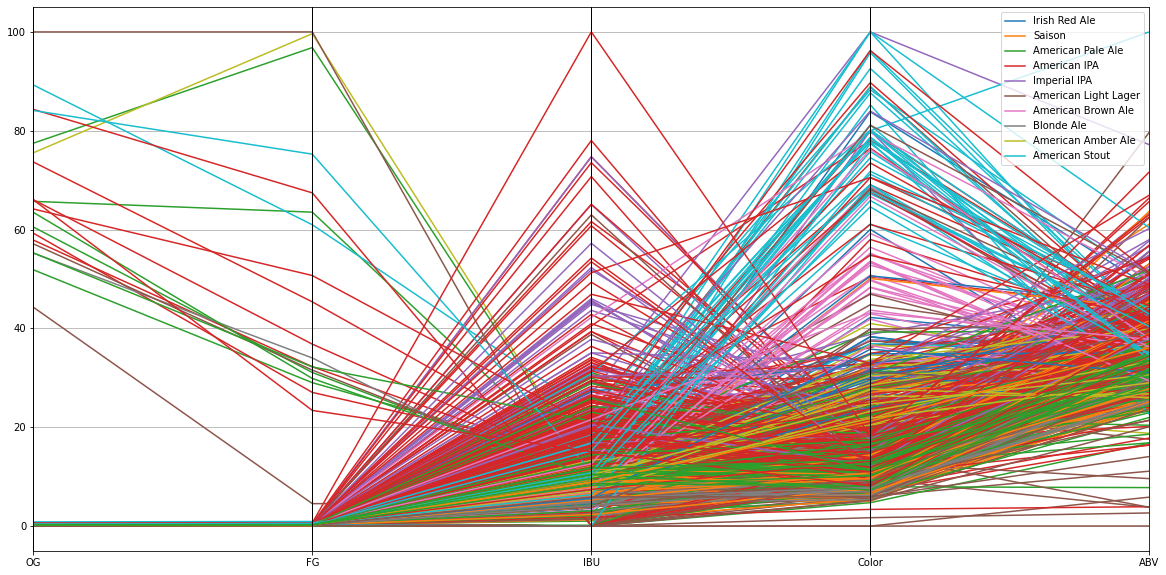

In [7]:
scaled_data = ss_data
columns = ['OG', 'FG', 'IBU', 'Color', 'ABV']
for col in columns:
    scaled_data[col] = ((scaled_data[col]-scaled_data[col].min())/(scaled_data[col].max()-scaled_data[col].min()))*100

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
pd.plotting.parallel_coordinates(scaled_data, class_column = 'Style', cols = columns, colormap = 'tab10');

## Conclusiones finales

Las nubes de puntos y las polilíneas no permiten visualizar bien la diferenciación entre clusters, pero calculando los promedios de cada clase, tal vez permita ver los centroides de cada una.